# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

594

In [3]:
cities_df = pd.DataFrame(cities)
cities_df.to_csv("output_data/cities.csv")
cities

['nikolskoye',
 'provideniya',
 'rikitea',
 'new norfolk',
 'castro',
 'mahon',
 'kaitangata',
 'airai',
 'sungairaya',
 'bredasdorp',
 'qaqortoq',
 'graham',
 'port blair',
 'bundaberg',
 'narsaq',
 'carnarvon',
 'maningrida',
 'bosaso',
 'namatanai',
 'butaritari',
 'cape town',
 'kualakapuas',
 'mandalgovi',
 'ushuaia',
 'georgetown',
 'bluff',
 'naze',
 'hilo',
 'harper',
 'ponta do sol',
 'coihaique',
 'punta arenas',
 'mataura',
 'mount isa',
 'kruisfontein',
 'avarua',
 'flinders',
 'tucupita',
 'dikson',
 'sept-iles',
 'arraial do cabo',
 'dudinka',
 'molokovo',
 'yerbogachen',
 'bethel',
 'nguru',
 'paamiut',
 'hamilton',
 'bengkulu',
 'clyde river',
 'illoqqortoormiut',
 'busselton',
 'east london',
 'atuona',
 'kudat',
 'svetlogorsk',
 'touros',
 'thompson',
 'peace river',
 'severo-yeniseyskiy',
 'khatanga',
 'upernavik',
 'tasiilaq',
 'longyearbyen',
 'olavarria',
 'benicarlo',
 'jamestown',
 'grand river south east',
 'taolanaro',
 'puerto ayora',
 'sayyan',
 'buzmeyin',


In [4]:
# Create the dataframe
city_weather = pd.DataFrame({"City": cities})
city_weather["Lat"] = ""
city_weather["Lng"] = ""
city_weather["Max Temp"] = ""
city_weather["Humidity"] = ""
city_weather["Cloudiness"] = ""

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
c=['punta arenas','rikitea']
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'
query_url = f'{url}appid={weather_api_key}&units={units}&q='
for city in cities:    
    try:
        response = requests.get(query_url + city).json()
        print(f"Processing Record {cities.index(city)} | {city}")
        city_weather.loc[cities.index(city),"Lat"] = response['coord']['lat']
        city_weather.loc[cities.index(city),"Lng"] = response['coord']['lon']
        city_weather.loc[cities.index(city),"Max Temp"] = response['main']['temp_max']
        city_weather.loc[cities.index(city),"Humidity"] = response['main']['humidity']
        city_weather.loc[cities.index(city),"Cloudiness"] = response['clouds']['all']
        city_weather.loc[cities.index(city),"Wind Speed"]= response['wind']['speed']
        city_weather.loc[cities.index(city),"Country"]= response['sys']['country']
        city_weather.loc[cities.index(city),"Date"]= response['dt']
    except:
        print('City not found. Skipping...')
        pass

Processing Record 0 | nikolskoye
Processing Record 1 | provideniya
Processing Record 2 | rikitea
Processing Record 3 | new norfolk
Processing Record 4 | castro
Processing Record 5 | mahon
Processing Record 6 | kaitangata
Processing Record 7 | airai
Processing Record 8 | sungairaya
Processing Record 9 | bredasdorp
Processing Record 10 | qaqortoq
Processing Record 11 | graham
Processing Record 12 | port blair
Processing Record 13 | bundaberg
Processing Record 14 | narsaq
Processing Record 15 | carnarvon
Processing Record 16 | maningrida
Processing Record 17 | bosaso
Processing Record 18 | namatanai
Processing Record 19 | butaritari
Processing Record 20 | cape town
Processing Record 21 | kualakapuas
Processing Record 22 | mandalgovi
Processing Record 23 | ushuaia
Processing Record 24 | georgetown
Processing Record 25 | bluff
Processing Record 26 | naze
Processing Record 27 | hilo
Processing Record 28 | harper
Processing Record 29 | ponta do sol
Processing Record 30 | coihaique
Processing 

Processing Record 235 | ust-nera
Processing Record 236 | nishihara
Processing Record 237 | okhotsk
Processing Record 238 | porbandar
Processing Record 239 | saldanha
Processing Record 240 | trinidad
Processing Record 241 | srednekolymsk
Processing Record 242 | olafsvik
Processing Record 243 | kavieng
Processing Record 244 | codrington
Processing Record 245 | athabasca
Processing Record 246 | tsihombe
City not found. Skipping...
Processing Record 247 | hauterive
Processing Record 248 | huilong
Processing Record 249 | attawapiskat
City not found. Skipping...
Processing Record 250 | fos-sur-mer
Processing Record 251 | uarini
Processing Record 252 | mandera
Processing Record 253 | celestun
Processing Record 254 | karpogory
Processing Record 255 | marrakesh
Processing Record 256 | redlands
Processing Record 257 | imperia
Processing Record 258 | ormara
Processing Record 259 | baoqing
Processing Record 260 | salalah
Processing Record 261 | severodvinsk
Processing Record 262 | kitakata
Process

Processing Record 458 | luxeuil-les-bains
Processing Record 459 | nargana
Processing Record 460 | quatre cocos
Processing Record 461 | aklavik
Processing Record 462 | yermakovskoye
Processing Record 463 | liverpool
Processing Record 464 | geraldton
Processing Record 465 | hualmay
Processing Record 466 | tanete
Processing Record 467 | anito
Processing Record 468 | novopetrovskoye
Processing Record 469 | nogliki
Processing Record 470 | karauli
Processing Record 471 | puerto lopez
Processing Record 472 | akdagmadeni
Processing Record 473 | gold coast
Processing Record 474 | xichang
Processing Record 475 | waipawa
Processing Record 476 | marawi
Processing Record 477 | chaman
Processing Record 478 | ussuriysk
Processing Record 479 | riyadh
Processing Record 480 | sri aman
Processing Record 481 | taltal
Processing Record 482 | wa
City not found. Skipping...
Processing Record 483 | thames
Processing Record 484 | tobol
Processing Record 485 | luderitz
Processing Record 486 | weihe
Processing R

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [51]:
city_weather.to_csv("output_data/city_weather.csv",index=False)

In [52]:
# Drop all na columns
city_weather_dropna = city_weather.dropna()
city_weather_dropna

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nikolskoye,59.7035,30.7861,49.39,73,2,10.16,RU,1.633565e+09
1,provideniya,64.3833,-173.3,41.11,81,75,6.71,RU,1.633565e+09
2,rikitea,-23.1203,-134.9692,74.26,78,99,15.95,PF,1.633565e+09
3,new norfolk,-42.7826,147.0587,56.71,48,73,5.99,AU,1.633565e+09
4,castro,-24.7911,-50.0119,64.33,94,98,1.10,BR,1.633565e+09
...,...,...,...,...,...,...,...,...,...
588,slave lake,55.2834,-114.769,44.94,70,100,10.98,CA,1.633566e+09
589,daru,-9.0763,143.2092,81.05,80,100,12.44,PG,1.633566e+09
590,san cristobal,7.7669,-72.225,71.78,96,70,3.09,VE,1.633566e+09
591,ketchikan,55.3422,-131.6461,52.27,40,20,0.00,US,1.633566e+09


In [53]:
#Change data types for numerical columns
city_weather_dropna = city_weather_dropna.infer_objects()

In [54]:
city_weather_dropna.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,5.400000e+02
mean,20.040165,21.711192,62.121685,73.859259,57.822222,7.502241,1.633566e+09
std,33.020440,91.956197,17.613333,18.729958,38.274784,5.442501,8.672115e+01
min,-54.800000,-175.200000,13.800000,8.000000,0.000000,0.000000,1.633565e+09
25%,-6.872800,-63.336975,49.145000,64.750000,20.000000,3.505000,1.633566e+09
50%,25.332600,29.603750,65.390000,78.000000,70.000000,6.120000,1.633566e+09
75%,47.704225,105.987675,76.975000,87.000000,96.000000,10.360000,1.633566e+09
max,78.218600,179.316700,92.970000,100.000000,100.000000,34.520000,1.633566e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [55]:
city_over100_humidity=city_weather_dropna.loc[city_weather_dropna['Humidity'].astype(float)>100,:]

In [56]:
#  Get the indices of cities that have humidity over 100%.
humidity_index = city_over100_humidity.index
humidity_index

Int64Index([], dtype='int64')

In [57]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_weather_dropna.drop(humidity_index)
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nikolskoye,59.7035,30.7861,49.39,73,2,10.16,RU,1.633565e+09
1,provideniya,64.3833,-173.3000,41.11,81,75,6.71,RU,1.633565e+09
2,rikitea,-23.1203,-134.9692,74.26,78,99,15.95,PF,1.633565e+09
3,new norfolk,-42.7826,147.0587,56.71,48,73,5.99,AU,1.633565e+09
4,castro,-24.7911,-50.0119,64.33,94,98,1.10,BR,1.633565e+09
...,...,...,...,...,...,...,...,...,...
588,slave lake,55.2834,-114.7690,44.94,70,100,10.98,CA,1.633566e+09
589,daru,-9.0763,143.2092,81.05,80,100,12.44,PG,1.633566e+09
590,san cristobal,7.7669,-72.2250,71.78,96,70,3.09,VE,1.633566e+09
591,ketchikan,55.3422,-131.6461,52.27,40,20,0.00,US,1.633566e+09


In [58]:
clean_city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,5.400000e+02
mean,20.040165,21.711192,62.121685,73.859259,57.822222,7.502241,1.633566e+09
std,33.020440,91.956197,17.613333,18.729958,38.274784,5.442501,8.672115e+01
min,-54.800000,-175.200000,13.800000,8.000000,0.000000,0.000000,1.633565e+09
25%,-6.872800,-63.336975,49.145000,64.750000,20.000000,3.505000,1.633566e+09
50%,25.332600,29.603750,65.390000,78.000000,70.000000,6.120000,1.633566e+09
75%,47.704225,105.987675,76.975000,87.000000,96.000000,10.360000,1.633566e+09
max,78.218600,179.316700,92.970000,100.000000,100.000000,34.520000,1.633566e+09


In [59]:
clean_city_data.to_csv("output_data/clean_city_data.csv",index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

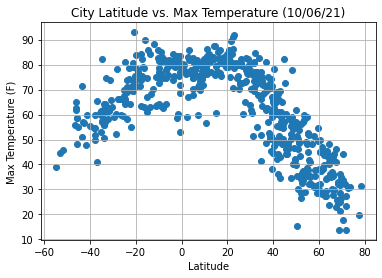

In [60]:
plt.scatter(clean_city_data['Lat'],clean_city_data['Max Temp'])
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature (10/06/21)')
plt.grid()
plt.savefig("output_data/Latitude_Temperature.png") 
plt.show()

## Latitude vs. Humidity Plot

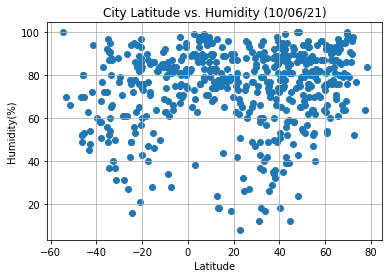

In [61]:
plt.scatter(clean_city_data['Lat'],clean_city_data['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('City Latitude vs. Humidity (10/06/21)')
plt.grid()
plt.savefig("output_data/Latitude_Humifity.png") 
plt.show()

## Latitude vs. Cloudiness Plot

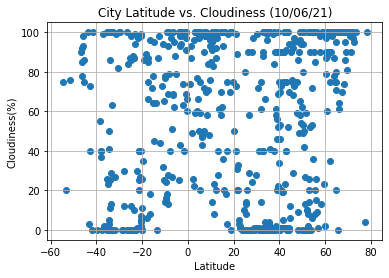

In [62]:
plt.scatter(clean_city_data['Lat'],clean_city_data['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('City Latitude vs. Cloudiness (10/06/21)')
plt.grid()
plt.savefig("output_data/Latitude_Cloudiness.png") 
plt.show()

## Latitude vs. Wind Speed Plot

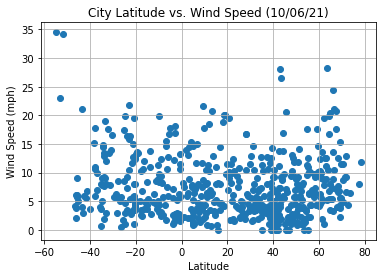

In [63]:
plt.scatter(clean_city_data['Lat'],clean_city_data['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed (10/06/21)')
plt.grid()
plt.savefig("output_data/Latitude_Wind Speed.png") 
plt.show()

## Linear Regression

In [64]:
northern_city_weahter = clean_city_data.loc[clean_city_data['Lat'] > 0,:]
southern_city_weahter = clean_city_data.loc[clean_city_data['Lat'] < 0,:]
print(northern_city_weahter.shape)
print(southern_city_weahter.shape)

(375, 9)
(165, 9)


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8522646426430598
The r-squared is: 0.7263550210995025


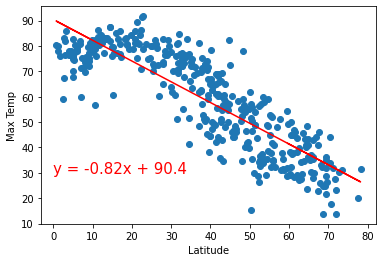

In [65]:
x_values=northern_city_weahter['Lat']
y_values=northern_city_weahter['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")
print(f"The r-squared is: {rvalue*rvalue}")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6916814200456657
The r-squared is: 0.4784231868363886


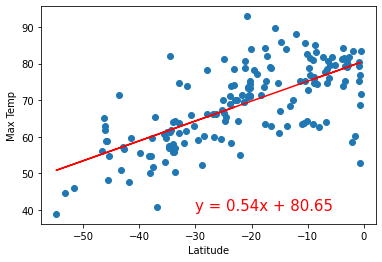

In [66]:
x_values=southern_city_weahter['Lat']
y_values=southern_city_weahter['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")
print(f"The r-squared is: {rvalue*rvalue}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0385786893415969
The r-squared is: 0.0014883152713154424


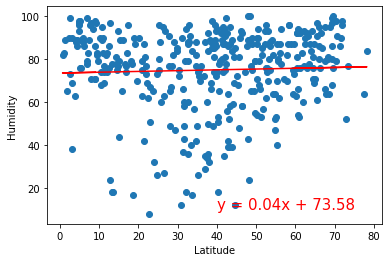

In [67]:
x_values=northern_city_weahter['Lat']
y_values=northern_city_weahter['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
print(f"The r-squared is: {rvalue*rvalue}")
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.24033430077675963
The r-squared is: 0.05776057612985396


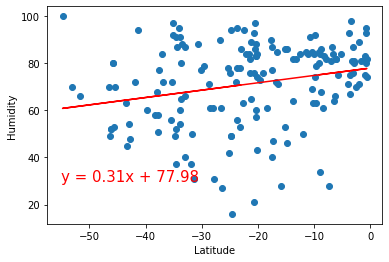

In [68]:
x_values=southern_city_weahter['Lat']
y_values=southern_city_weahter['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
print(f"The r-squared is: {rvalue*rvalue}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.10984956628848791
The r-squared is: 0.0120669272137689


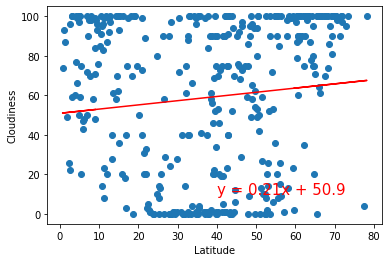

In [69]:
x_values=northern_city_weahter['Lat']
y_values=northern_city_weahter['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
print(f"The r-squared is: {rvalue*rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.18006992411768
The r-squared is: 0.03242517757174703


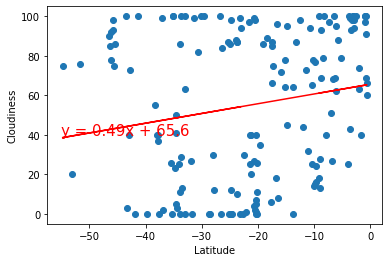

In [70]:
x_values=southern_city_weahter['Lat']
y_values=southern_city_weahter['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
print(f"The r-squared is: {rvalue*rvalue}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0990313944141129
The r-squared is: 0.009807217079603593


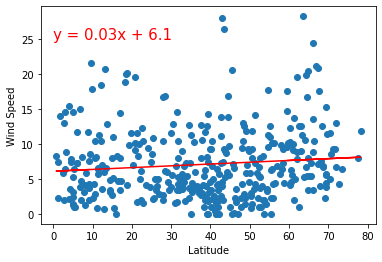

In [71]:
x_values=northern_city_weahter['Lat']
y_values=northern_city_weahter['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}")
print(f"The r-squared is: {rvalue*rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.20713723941864484
The r-squared is: 0.042905835953977


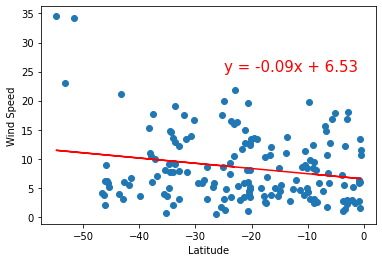

In [72]:
x_values=southern_city_weahter['Lat']
y_values=southern_city_weahter['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}")
print(f"The r-squared is: {rvalue*rvalue}")
plt.show()